# 1. Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Para mejorar la reproducibilidad, se verifican las versiones de las bibliotecas.

def verifica_version(nombre_biblioteca, biblioteca, esperada):
    """Verifica que la biblioteca tenga la versión esperada, o se lanza una Excepción."""
    if isinstance(biblioteca, str):
        vers=biblioteca
    else:
        vers=biblioteca.__version__
    if (vers != esperada):
        raise Exception(f'Versión inesperada de {nombre_biblioteca}: {vers}.')
    print(f"Versión de {nombre_biblioteca} {vers}: correcto.")

from matplotlib import __version__ as matplotlib_version

verifica_version('Pandas', pd, '2.2.2')
verifica_version('Numpy', np, '2.1.1')
verifica_version('Matplotlib', matplotlib_version, '3.9.2')

Versión de Pandas 2.2.2: correcto.
Versión de Numpy 2.1.1: correcto.
Versión de Matplotlib 3.9.2: correcto.


# 2. Adquisición de datos

In [3]:
# Path de datasets locales
Microdatos_2020_01_csv_path = 'Microdatos_2020_01.csv'
Microdatos_1999_01_csv_path = 'Microdatos_1999_01.csv'

# Crea DataFrame con toda la historia
df_exp1 = pd.read_csv(Microdatos_2020_01_csv_path, encoding='latin-1')
df_exp2 = pd.read_csv(Microdatos_1999_01_csv_path, encoding='latin-1')
df = pd.concat([df_exp1, df_exp2], ignore_index=True) # no se conservan los índices porque no son relevantes

# 3. Inspección inicial

Obtener información general sobre los datos, tal como la cantidad de filas y columnas, los valores de los datos, los tipos de datos y los valores faltantes en el conjunto de datos.

In [4]:
# Dimensiones de los datos
rows, cols = df.shape
if (cols != 7 or rows <= 1500000):
    raise Exception(f"Se detectaron menos registros y/o columnas en el dataset que antes.")
if (cols != 7 or rows > 1600000):
    raise Exception(f"Se detectaron más registros y/o columnas en el dataset que antes.")
print(f'Hay 7 columnas y poco mas de un millón y medio de registros ({rows})')


Hay 7 columnas y poco mas de un millón y medio de registros (1551362)


In [5]:
# Visualización de los primeros y últimos 3 renglones, y 10 aleatorios.
display(df.head(3), df.tail(3), df.sample(10))

,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgen_a20,infgent,Inflación general al cierre de 2020,Inflación general al cierre del año en curso (...,5,3.647


,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
1551359,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,65,2.2
1551360,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,92,1.9
1551361,2019-12-01,pibeu_a21,pibeutmas2,Tasa de crecimiento de Estados Unidos en 2021,Variación porcentual anual del PIB de Estados ...,94,2.0


,FechaEncuesta,NombreAbsolutoCorto,NombreRelativoCorto,NombreAbsolutoLargo,NombreRelativoLargo,IdAnalista,Dato
501113,2024-01-01,varpib_prob_a24_r14,varpibptrango14,"Variación porcentual anual del PIB en 2024, pr...",Variación porcentual anual del PIB en el año e...,19,0.00
381260,2023-01-01,limcrec12_m01_a23,limcrec12mest,Percepción - ausencia de cambio estructural en...,limcrec12_mest_añot,22,1.00
1138961,2016-01-01,varpib_a18,varpibtmas2,"Variación porcentual anual del PIB, 2018","Variación porcentual anual del PIB, dentro de ...",27,3.00
1501972,2019-08-01,infsub_prob_a20_r12,infsubptmas1rango12,"Inflación subyacente al cierre de 2020, probab...",Inflación subyacente al cierre del siguiente a...,12,0.00
659315,2003-09-01,balcom_a04,balcomtmas1,"Balanza Comercial, saldo anual al cierre de 2004","Balanza Comercial, saldo anual al cierre del s...",25,-8500.00
803418,2010-06-01,tc_m12_a10,tcmestmas6,Valor del tipo de cambio promedio durante dici...,Valor del tipo de cambio promedio durante el m...,15,12.35
581921,2024-08-01,limcrec10_nivpreoc_m08_a24,limcrec10nivpreocmest,Percepción - incertidumbre situación economía ...,limcrec10_nivelpreocupación_mest_añot,31,7.00
205503,2021-09-01,infgen_prob_a12m_r8_m10_a21,infgen12mrango8mestmas1,Inflación general a 12 meses (entre octubre de...,inflacióngeneral_prob12m(3.1-3.5)_mestmas1,5,23.00
333874,2022-09-01,infsub_prob_a12m_r12,infsub12mrango12,"Inflación subyacente a 12 meses, prob. de que ...",inflaciónsubyacente_prob12m(5.1-5.5),29,0.00
1160384,2016-04-01,infgen_prob_a17_r1,infgenptmas1rango1,"Inflación general al cierre de 2017, probabili...",Inflación general al cierre del siguiente año ...,60,0.00


In [6]:
# Las columnas son: 'FechaEncuesta', 'NombreAbsolutoCorto', 'NombreRelativoCorto', 'NombreAbsolutoLargo',
# 'NombreRelativoLargo', 'IdAnalista', 'Dato'
df.columns

Index(['FechaEncuesta', 'NombreAbsolutoCorto', 'NombreRelativoCorto',
       'NombreAbsolutoLargo', 'NombreRelativoLargo', 'IdAnalista', 'Dato'],
      dtype='object')

In [7]:
# Tipos de las columnas
df.dtypes
# Sólo 2 se detectan como numéricas

FechaEncuesta           object
NombreAbsolutoCorto     object
NombreRelativoCorto     object
NombreAbsolutoLargo     object
NombreRelativoLargo     object
IdAnalista               int64
Dato                   float64
dtype: object

# 4. Preparación de los datos

## 4.1. Reducción de los datos

In [8]:
# Se eliminan las columnas con el nombre 'Absoluto' de la variable,
# porque son columnas derivadas de la columna FechaEncuesta y las columnas
# con nombre 'Relativo' y por tanto no agregan valor para el análisis.
df = df.drop(['NombreAbsolutoCorto', 'NombreAbsolutoLargo'], axis = 1)
df.head()

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870


## 4.2. Limpieza de los datos

### Registros duplicados, valores faltantes

In [9]:
# Registros duplicados
s_duplicados=df.duplicated()
print('Existen:', s_duplicados[s_duplicados==True].size, 'registros duplicados, los cuales se eliminan.')
df.drop_duplicates(inplace=True)

Existen: 988 registros duplicados, los cuales se eliminan.


In [10]:
# Valores faltantes
df.isnull().sum()
# No existen valores faltantes

FechaEncuesta          0
NombreRelativoCorto    0
NombreRelativoLargo    0
IdAnalista             0
Dato                   0
dtype: int64

### Nombres incongruentes de variable

Un NombreRelativoCorto debe tener un sólo NombreRelativoLargo y viceversa.

In [11]:
# Obtiene pares únicos de nombres de variables
df_variables=df[['NombreRelativoCorto','NombreRelativoLargo']].drop_duplicates()

# Buscar más de un NombreRelativoCorto en cada NombreRelativoLargo
s_incongr=df_variables['NombreRelativoLargo'].duplicated()
cuenta=s_incongr[s_incongr==True].size
print(f"Se detectaron {cuenta} NombreRelativoLargos con más de un NombreRelativoCorto.")
if (cuenta != 0):
    raise Exception(f"Se detectaron {cuenta} NombreRelativoLargos con más de un NombreRelativoCorto, falta eliminarlas")

# Buscar más de un NombreRelativoLargo en cada NombreRelativoCorto
s_incongr=df_variables['NombreRelativoCorto'].duplicated()
cuenta=s_incongr[s_incongr==True].size
if (cuenta == 0):
    raise Exception(f"No se detectó ningún NombreRelativoLargo con más de un NombreRelativoCorto")
print(f"Se detectaron {cuenta} NombreRelativoCorto con más de un NombreRelativoLargos:")
df_incongruentes=df_variables.loc[s_incongr]
display(df_incongruentes)
print('----------------')

# Se eliminan los renglones con NombreRelativoCorto incongruentes
arr_variables_incongruentes=df_incongruentes['NombreRelativoCorto'].unique()
print('Eliminando las siguientes variables con NombreRelativoCorto que tiene más de un NombreRelativoLargo:\n\t', arr_variables_incongruentes)
df_sin_incongruentes=df.query("NombreRelativoCorto not in @arr_variables_incongruentes")

print(f'Se eliminó el {(df.index.size-df_sin_incongruentes.index.size)/df.index.size*100:.2f} % de los renglones')
df=df_sin_incongruentes

Se detectaron 0 NombreRelativoLargos con más de un NombreRelativoCorto.
Se detectaron 3 NombreRelativoCorto con más de un NombreRelativoLargos:


,NombreRelativoCorto,NombreRelativoLargo
8224,tcmestmas1,Valor del tipo de cambio promedio durante el m...
8253,tcmestmas2,Valor del tipo de cambio promedio durante el m...
121695,tcmestmas3,Valor del tipo de cambio al cierre dentro de t...


----------------
Eliminando las siguientes variables con NombreRelativoCorto que tiene más de un NombreRelativoLargo:
	 ['tcmestmas1' 'tcmestmas2' 'tcmestmas3']
Se eliminó el 2.58 % de los renglones


## 4.3. Conversión de tipo de datos

In [12]:
print('Antes:')
display(df.dtypes)

# Convierte la FechaEncuesta a datetime
df['FechaEncuesta'] = pd.to_datetime(df['FechaEncuesta'], errors='raise')
print('\nDespués:')
display(df.dtypes, df.head())

Antes:


FechaEncuesta           object
NombreRelativoCorto     object
NombreRelativoLargo     object
IdAnalista               int64
Dato                   float64
dtype: object


Después:


FechaEncuesta          datetime64[ns]
NombreRelativoCorto            object
NombreRelativoLargo            object
IdAnalista                      int64
Dato                          float64
dtype: object

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870


In [13]:
# Observando los valores únicos por columna, no parece haber variables categóricas, sino sólo contínuas
df.nunique()

FechaEncuesta            309
NombreRelativoCorto      595
NombreRelativoLargo      595
IdAnalista                98
Dato                   25403
dtype: int64

## 4.4. Agregar columnas calculadas

In [14]:
df['AñoEncuesta'] = df['FechaEncuesta'].dt.year   # Columna con el año
df['MesEncuesta'] = df['FechaEncuesta'].dt.month  # Columna con el número de mes
display(df.dtypes, df.head(), df.tail())

FechaEncuesta          datetime64[ns]
NombreRelativoCorto            object
NombreRelativoLargo            object
IdAnalista                      int64
Dato                          float64
AñoEncuesta                     int32
MesEncuesta                     int32
dtype: object

,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato,AñoEncuesta,MesEncuesta
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500,2020,1
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540,2020,1
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647,2020,1
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500,2020,1
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870,2020,1


,FechaEncuesta,NombreRelativoCorto,NombreRelativoLargo,IdAnalista,Dato,AñoEncuesta,MesEncuesta
1551357,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,59,1.9,2019,12
1551358,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,61,1.6,2019,12
1551359,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,65,2.2,2019,12
1551360,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,92,1.9,2019,12
1551361,2019-12-01,pibeutmas2,Variación porcentual anual del PIB de Estados ...,94,2.0,2019,12


## 4.5. Simplificar nombres columnas

In [15]:
# Simplifica el nombre de las columnas
print('Antes:\n', df.columns)
df=df.rename(columns={
    'FechaEncuesta'      :'Fecha',
    'NombreRelativoCorto':'IdVariable',
    'NombreRelativoLargo':'Variable',
    'IdAnalista'         :'IdAnalista',
    'Dato'               :'Expectativa',
    'AñoEncuesta'        :'Año',
    'MesEncuesta'        :'Mes'
})
print('\nDespués:\n', df.columns)
display(df.head())

Antes:
 Index(['FechaEncuesta', 'NombreRelativoCorto', 'NombreRelativoLargo',
       'IdAnalista', 'Dato', 'AñoEncuesta', 'MesEncuesta'],
      dtype='object')

Después:
 Index(['Fecha', 'IdVariable', 'Variable', 'IdAnalista', 'Expectativa', 'Año',
       'Mes'],
      dtype='object')


,Fecha,IdVariable,Variable,IdAnalista,Expectativa,Año,Mes
0,2020-01-01,infgent,Inflación general al cierre del año en curso (...,3,3.500,2020,1
1,2020-01-01,infgent,Inflación general al cierre del año en curso (...,4,3.540,2020,1
2,2020-01-01,infgent,Inflación general al cierre del año en curso (...,5,3.647,2020,1
3,2020-01-01,infgent,Inflación general al cierre del año en curso (...,7,3.500,2020,1
4,2020-01-01,infgent,Inflación general al cierre del año en curso (...,8,3.870,2020,1


## 4.6. Homologación de valores

### Orden renglones

In [16]:
# Se ve desordenado por fecha
print('Antes:\n',df['Año'].unique())

# Ordenar por fecha
df=df.sort_values(by=['Año','Mes', 'Variable', 'IdAnalista'])
print('Después:\n',df['Año'].unique())

Antes:
 [2020 2021 2022 2023 2024 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
Después:
 [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


### Orden columnas

In [17]:
print('Antes:')
display(df.columns,df.head())

df = df.reindex(columns=['Fecha','Año', 'Mes','IdVariable','Variable','IdAnalista','Expectativa'])

print('\nDespués:')
display(df.columns,df.head())

Antes:


Index(['Fecha', 'IdVariable', 'Variable', 'IdAnalista', 'Expectativa', 'Año',
       'Mes'],
      dtype='object')

,Fecha,IdVariable,Variable,IdAnalista,Expectativa,Año,Mes
594618,1999-01-01,saldopubt,Balance económico del sector público al cierre...,2,-1.9,1999,1
594619,1999-01-01,saldopubt,Balance económico del sector público al cierre...,4,-1.6,1999,1
594620,1999-01-01,saldopubt,Balance económico del sector público al cierre...,9,-1.3,1999,1
594621,1999-01-01,saldopubt,Balance económico del sector público al cierre...,10,-1.5,1999,1
594622,1999-01-01,saldopubt,Balance económico del sector público al cierre...,11,-1.4,1999,1



Después:


Index(['Fecha', 'Año', 'Mes', 'IdVariable', 'Variable', 'IdAnalista',
       'Expectativa'],
      dtype='object')

,Fecha,Año,Mes,IdVariable,Variable,IdAnalista,Expectativa
594618,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,2,-1.9
594619,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,4,-1.6
594620,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,9,-1.3
594621,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,10,-1.5
594622,1999-01-01,1999,1,saldopubt,Balance económico del sector público al cierre...,11,-1.4


### Homologación de Variables

#### Pasar las variables a columnas

In [18]:
# En el dataset real
uniqvars=df['IdVariable'].unique()
uniqvars=np.delete(uniqvars,415)  # esta variable tiene repetidos, si se incluye aparece error: Index contains duplicate entries, cannot reshape
df_subset=df.query("IdVariable in @uniqvars")
df_varscols=df_subset.pivot(
    index=['Año', 'Mes', 'Fecha','IdAnalista'],
    columns=['IdVariable', 'Variable'],
    values='Expectativa')
df_varscols

IdVariable                                                                                   saldopubt  \
Variable                       Balance económico del sector público al cierre del año en curso (año t)   
Año  Mes Fecha      IdAnalista                                                                           
1999 1   1999-01-01 2                                                        -1.9                        
                    4                                                        -1.6                        
                    8                                                         NaN                        
                    9                                                        -1.3                        
                    10                                                       -1.5                        
...                                                                           ...                        
2024 9   2024-09-01 97                                                       -5.0                        
                    98                                                       -6.1                        
                    99                                                       -6.1                        
                    100                                                      -5.1                        
                    101                                                      -5.0                        

IdVariable                                                                               balcomt  \
Variable                       Balanza Comercial, saldo anual al cierre del año en curso (año t)   
Año  Mes Fecha      IdAnalista                                                                     
1999 1   1999-01-01 2                                                     -8584.0                  
                    4                                                     -5018.0                  
                    8                                                     -5602.0                  
                    9                                                     -6400.0                  
                    10                                                    -8336.6                  
...                                                                           ...                  
2024 9   2024-09-01 97                                                   -16750.0                  
                    98                                                   -14133.0                  
                    99                                                    -9300.0                  
                    100                                                  -14100.0                  
                    101                                                  -12684.0                  

IdVariable                                                                                  cct  \
Variable                       Cuenta Corriente, saldo anual al cierre del año en curso (año t)   
Año  Mes Fecha      IdAnalista                                                                    
1999 1   1999-01-01 2                                                    -12184.0                 
                    4                                                    -12420.0                 
                    8                                                    -13807.0                 
                    9                                                    -15300.0                 
                    10                                                   -14300.0                 
...                                                                           ...                 
2024 9   2024-09-01 97                                                   -14730.0                 
                    98                                                   -16054.0                 
                    99   

**====== PENDIENTE:**

Convertir variables categóricas (si/no; mucho/poco/nada).

5. Estadísticas descriptivas
6. Visualización
7. Análisis de variables
univariate, bivariate, or multivariate
8. Análisis de series de tiempo
When we analyze time series data, we can typically uncover patterns or trends that repeat over time and present a temporal seasonality. Key components of time series data include trends, seasonal variations, cyclical variations, and irregular variations or noise.}


# Estadísticas descriptivas

## Análisis de número de respuestas

<Axes: title={'center': 'Número de preguntas por año de la Encuesta (2024 año en curso)'}, xlabel='Año de la Enuesta'>

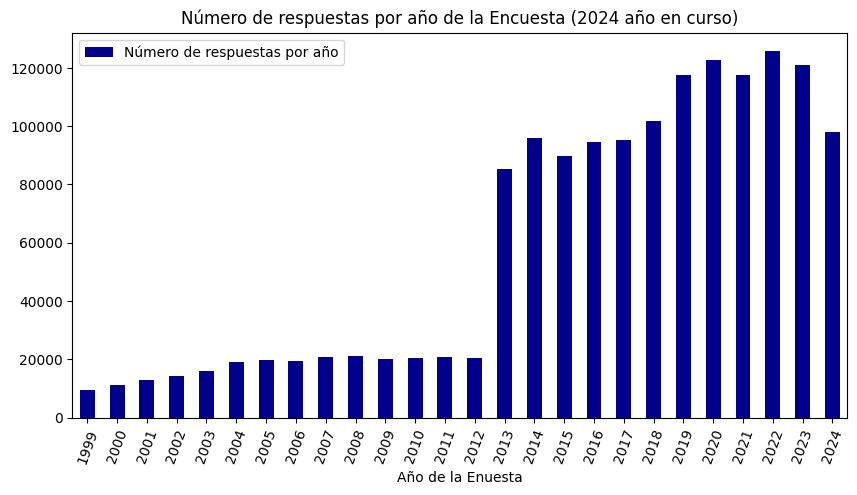

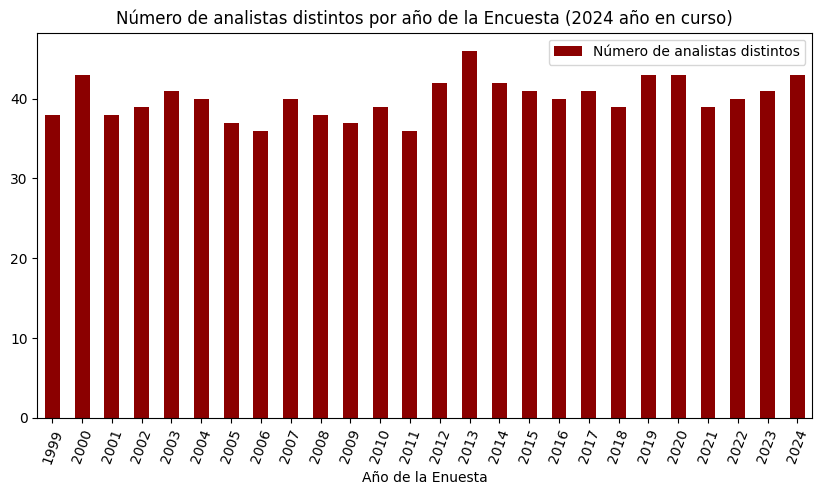

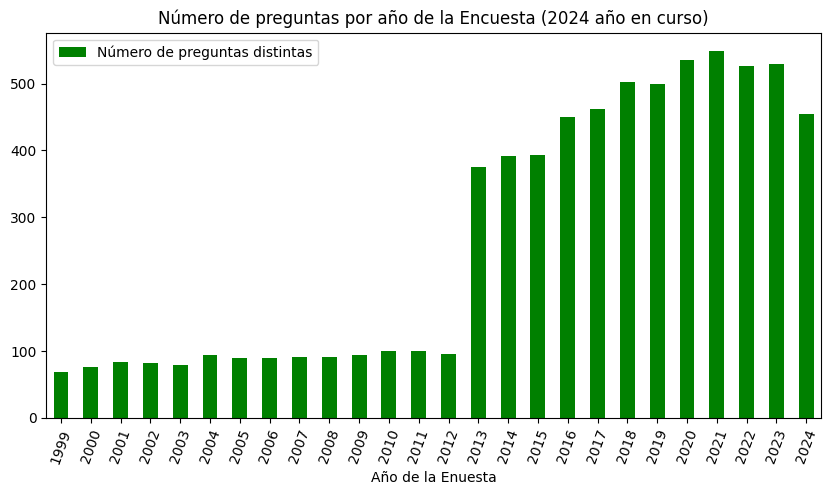

In [19]:
respuestasPorAño = df.groupby(by=["Año"])["Expectativa"].count()
respuestasPorAño.name = 'Número de respuestas por año'
respuestasPorAño.index.name = 'Año de la Enuesta'
respuestasPorAño.to_frame().plot.bar(
    title='Número de respuestas por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color='darkblue')

analistasDistintosPorAño = df.groupby(by=["Año"])["IdAnalista"].unique().apply(len)
analistasDistintosPorAño.name = 'Número de analistas distintos'
analistasDistintosPorAño.index.name = 'Año de la Enuesta'
analistasDistintosPorAño.to_frame().plot.bar(
    title='Número de analistas distintos por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color ='darkred')

analistasDistintosPorAño = df.groupby(by=["Año"])["Variable"].unique().apply(len)
analistasDistintosPorAño.name = 'Número de preguntas distintas'
analistasDistintosPorAño.index.name = 'Año de la Enuesta'
analistasDistintosPorAño.to_frame().plot.bar(
    title='Número de preguntas por año de la Encuesta (2024 año en curso)',
    rot=70,
    figsize=(10, 5),
    color ='g')

---

**Por tanto, se concluye que el aumento de respuestas desde 2013 se podría explicar por el aumento de preguntas más que por el aumento de analistas.**

---

## Análisis de la Expectativa de Inflación General Anual

,Año,Expectativa
594126,1999,16.20
594127,1999,15.43
594128,1999,17.61
594129,1999,15.98
594130,1999,17.80
...,...,...
583129,2024,4.84
583130,2024,4.46
583131,2024,4.70
583132,2024,4.42


Text(0.5, 1.0, 'Expectativa de Inflación General al cierre del año de la encuesta')

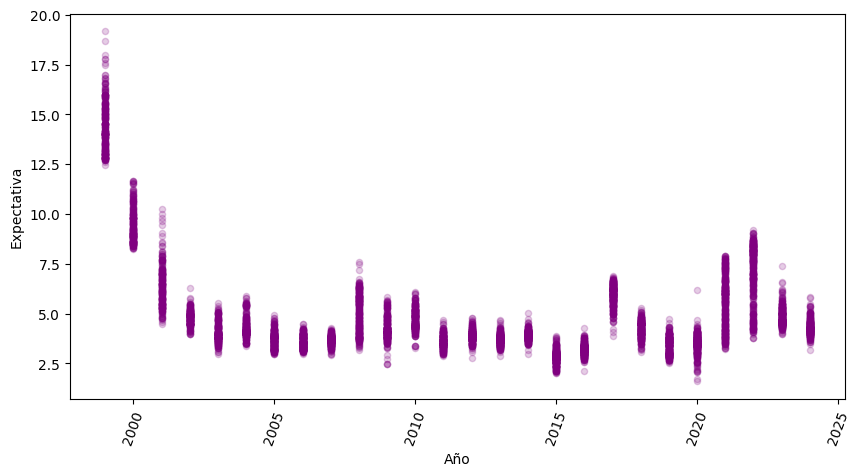

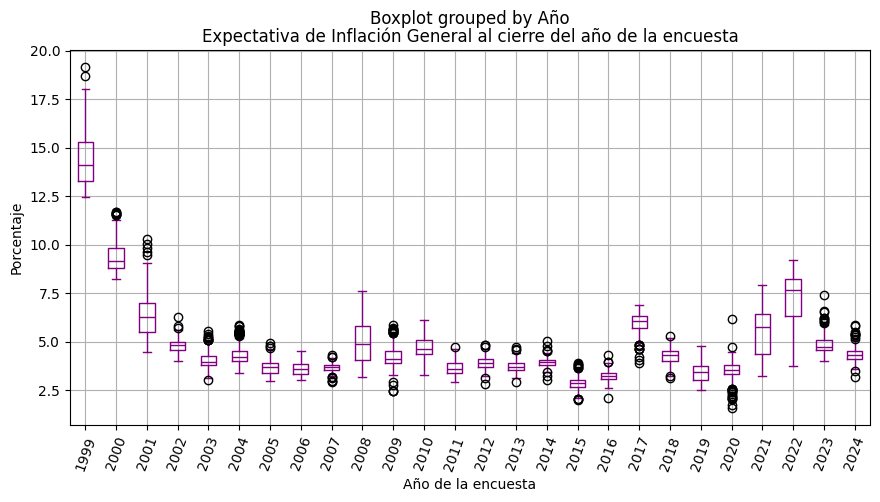

In [20]:
inflacion_general_anual = df.query('IdVariable=="infgent"')

inflacion_general_anual = inflacion_general_anual[['Año','Expectativa']] # Crea dataframe con sólo estas dos columnas
display(inflacion_general_anual)

inflacion_general_anual.plot.scatter(
    x='Año', y='Expectativa',
    rot=70,
    figsize=(10, 5),
    color='purple', alpha=0.2)

# Se asume que la distribución es normal, por lo que hacemos una gráfica de caja
axes = inflacion_general_anual.boxplot(
    column='Expectativa', by='Año',
    ylabel='Porcentaje', xlabel='Año de la encuesta',
    rot=70,
    figsize=(10, 5),
    color='purple')
axes.set_title('Expectativa de Inflación General al cierre del año de la encuesta')

# Correlaciones

In [25]:
# Calcula la correlación entre todas las variables.
df_corrs=df_varscols.corr()
print(f'Son {df_varscols.columns.size} variables.')
df_corrs.sample(4)

Son 594 variables.


,IdVariable,saldopubt,balcomt,cct,infgent,infgentmas1,infgenmestmas2,infgenmestmas3,infgenmest,infgenmestmas1,infgen12meses,...,infsubmestmas12,infsubmestmas2,infsubmestmas3,infsubmestmas4,infsubmestmas5,infsubmestmas6,infsubmestmas7,infsubmestmas8,infsubmestmas9,infsubmestmas1
,Variable,Balance económico del sector público al cierre del año en curso (año t),"Balanza Comercial, saldo anual al cierre del año en curso (año t)","Cuenta Corriente, saldo anual al cierre del año en curso (año t)",Inflación general al cierre del año en curso (año t),Inflación general al cierre del siguiente año (año t+1),Inflación general para dentro de 2 meses (mes t+2),Inflación general para dentro de 3 meses (mes t+3),Inflación general para el mes en curso (mes t),Inflación general para el siguiente mes (mes t+1),Inflacióngeneral_12m_próximos,...,Inflación subyacente para dentro de 12 meses (mes t+12),Inflación subyacente para dentro de 2 meses (mes t+2),Inflación subyacente para dentro de 3 meses (mes t+3),Inflación subyacente para dentro de 4 meses (mes t+4),Inflación subyacente para dentro de 5 meses (mes t+5),Inflación subyacente para dentro de 6 meses (mes t+6),Inflación subyacente para dentro de 7 meses (mes t+7),Inflación subyacente para dentro de 8 meses (mes t+8),Inflación subyacente para dentro de 9 meses (mes t+9),Inflación subyacente para el siguiente mes (mes t+1)
IdVariable,Variable,,,,,,,,,,,,,,,,,,,,,
infgen12mrango8,inflacióngeneral_prob12m(3.1-3.5),0.028582,0.260210,-0.010362,-0.370234,-0.494675,-0.141810,-0.116215,-0.108654,-0.144626,-0.596642,...,-0.229245,-0.396592,-0.359687,-0.338283,-0.289985,-0.276427,-0.240613,-0.211698,-0.277264,-0.386765
infsub12mrango12,inflaciónsubyacente_prob12m(5.1-5.5),-0.059575,-0.239724,0.059562,0.470104,0.441910,0.112372,0.104240,0.140008,0.139763,0.541742,...,0.220118,0.421822,0.322435,0.344194,0.267457,0.247758,0.248381,0.329131,0.313026,0.389012
saldorfsptmenos1,Saldo de requerimientos financieros del sector público al cierre del año anterior al correspondiente del levantamiento de la Encuesta (año t-1),0.661643,-0.027505,-0.150296,0.013056,0.003257,-0.074412,-0.011701,-0.005433,-0.111337,-0.018094,...,0.029925,0.032958,0.103469,0.206183,0.161252,0.172920,0.105199,0.035189,0.037160,0.224197
infsubptmas2rango6,"Inflación subyacente al cierre dentro de dos años (año t+2), probabilidad de que se encuentre en rango (2.1 a 2.5 %)",-0.012746,0.074829,-0.074380,-0.179778,-0.178809,-0.039901,-0.054408,-0.075550,-0.042595,-0.130586,...,-0.115933,-0.041675,-0.059455,-0.080920,-0.061734,-0.090521,-0.087689,-0.076648,-0.047984,-0.039829


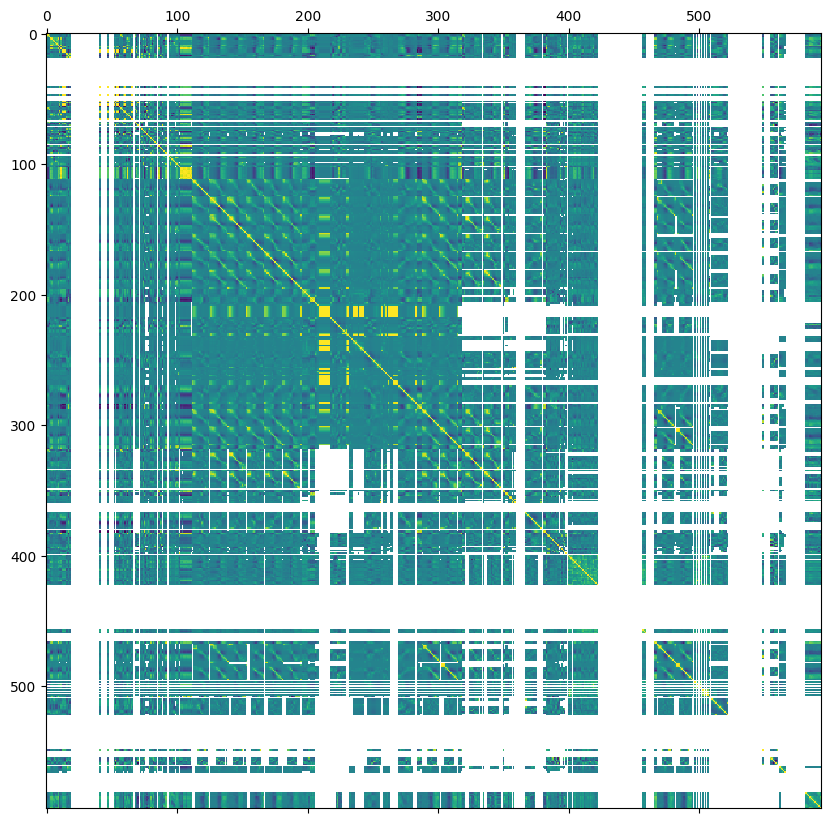

Son demasiadas variables para una sola gráfica.


In [26]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_corrs, f)
plt.show()
print('Son demasiadas variables para una sola gráfica.')